**Loading Libraries**

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

**Loading your MNIST dataset for the data loader**

In [3]:
transform = transforms.Compose ([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

mnist_trainset = datasets.MNIST(root='./data', train= True, download = True, transform=transform)
train_loader = torch.utils.data.DataLoader(mnist_trainset,batch_size=10,shuffle=True)

mnist_testset = datasets.MNIST(root ='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=10, shuffle=True)



100%|██████████| 9912422/9912422 [00:00<00:00, 66673152.78it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 29295210.11it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 68915641.75it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 10954875.66it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



**Visualize several MNIST datasets**

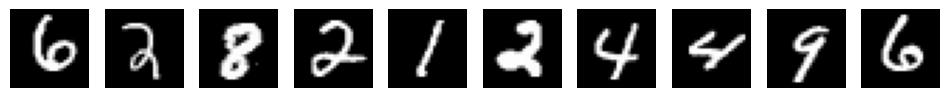

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_images(images):
  fig, axs = plt.subplots(1, len(images), figsize = (12,6))
  for i, image in enumerate(images) :
    axs[i].imshow(image.squeeze().numpy(), cmap='gray')
    axs[i].axis('off')

images, labels = next(iter(train_loader))
plot_images(images[:10])


**Design your Neural Network model**

In [36]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, input_size=784, output_size=10, layers=[120, 84]):
        super().__init__()
        self.d1 = nn.Linear(input_size, layers[0])
        self.d2 = nn.Linear(layers[0], layers[1])
        self.d3 = nn.Linear(layers[1], output_size)

    def forward(self, x):
        x = F.relu(self.d1(x))
        x = F.relu(self.d2(x))
        x = self.d3(x)
        return F.log_softmax(x, dim=1)


In [37]:
model = MultilayerPerceptron()

Setup your hyperparameter such as Loss Function, Optimizer,
Learning Rate, etc

In [38]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Develop a training loop and run a training model

In [46]:
def train(model, train_loader, optimizer, criterion, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct_predictions = 0
        total_samples = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs.view(inputs.size(0), -1))
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f'[{epoch+1}, {epoch+ 1:5d}] Loss: {running_loss/2000:.5f}')

train(model, train_loader, optimizer, criterion, epochs=10)

[1,     1] Loss: 0.49351
[2,     2] Loss: 0.40119
[3,     3] Loss: 0.34461
[4,     4] Loss: 0.31776
[5,     5] Loss: 0.28940
[6,     6] Loss: 0.27176
[7,     7] Loss: 0.25455
[8,     8] Loss: 0.23943
[9,     9] Loss: 0.22175
[10,    10] Loss: 0.21462


Evaluate the Model using several performance metrics such as
accuracy, confusion matrix, F1 Score, Precision, Recall, etc

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def evaluate(model, test_loader):
    model.eval()
    all_predictions = []
    all_targets = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs.view(inputs.size(0), -1))
            _, predictions = torch.max(outputs, 1)
            all_predictions.extend(predictions.cpu().numpy())
            all_targets.extend(labels.cpu().numpy())
    return all_targets, all_predictions

true_labels, predicted_labels = evaluate(model, test_loader)

accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy:.4f}')



Accuracy: 0.9679


In [51]:
confusion = confusion_matrix(true_labels, predicted_labels)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[ 961    2    0    0    1    3    7    0    2    4]
 [   0 1123    1    1    0    2    4    0    4    0]
 [   5    6  979   17    1    2    2    5   14    1]
 [   0    0    1  980    0   10    0    4    9    6]
 [   0    3    1    1  921    2   11    1    1   41]
 [   3    0    1    2    1  875    3    0    3    4]
 [   4    3    0    1    7   11  929    0    3    0]
 [   2    9    6    9    2    0    1  971    7   21]
 [   4    1    2    4    3    5    2    2  948    3]
 [   2    1    0    5    2    2    0    1    4  992]]


In [52]:
report = classification_report(true_labels, predicted_labels, target_names=[str(i) for i in range(10)])
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.99      0.95      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.94      0.96       982
           5       0.96      0.98      0.97       892
           6       0.97      0.97      0.97       958
           7       0.99      0.94      0.97      1028
           8       0.95      0.97      0.96       974
           9       0.93      0.98      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

